# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from uo2009.dgp.params import EfficientPriceParams, NoiseParamsMA2
from uo2009.dgp.simulate import simulate_section4_1_1

from uo2009.estimators.test_statistics import compute_Z_lk_sync

## Create parameter objects

In [3]:
eff_params = EfficientPriceParams()     # uses defaults in params.py
noise_params = NoiseParamsMA2()         # nsr1, nsr2

## One simulation run + returns

In [4]:
rng = np.random.default_rng(123)

out = simulate_section4_1_1(
    eff_params=eff_params,
    noise_params=noise_params,
    delta_seconds=10.0,
    rng=rng,
)

y = out.y_obs                 # (n_obs, 2)
t_obs = out.t_obs                 # (n_obs, 1)

# Observed prices of the two assets
y1_obs = y[:, 0]
y2_obs = y[:, 1]

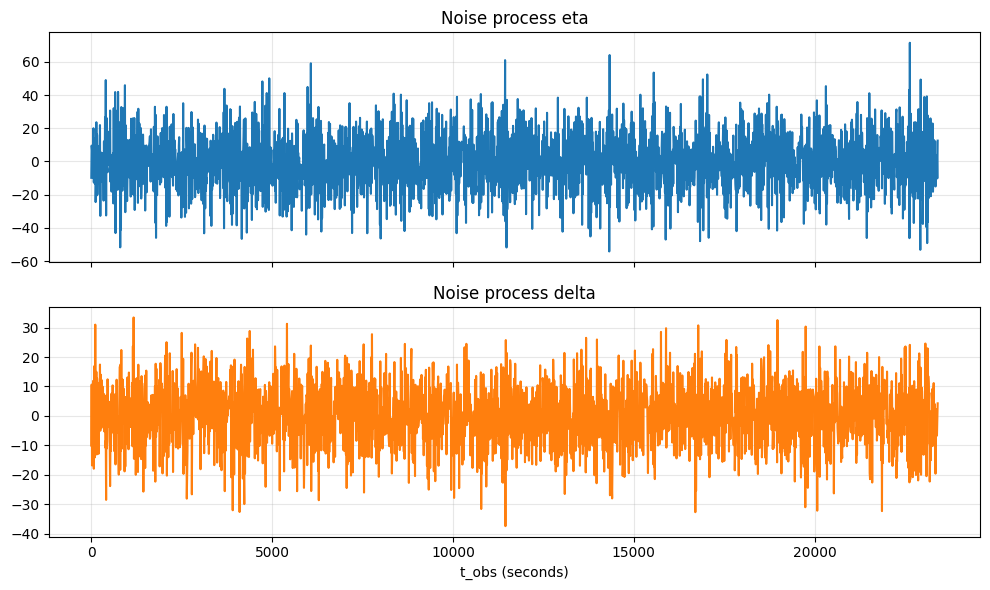

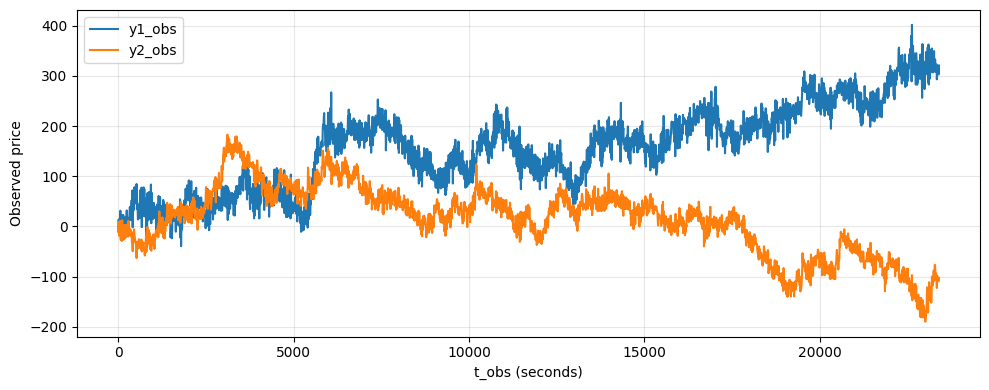

In [5]:
# Noise processes
noise = out.noise
eta = noise[:, 0]
delta = noise[:, 1]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax[0].plot(t_obs, eta, label="eta")
ax[0].set_title("Noise process eta")
ax[1].plot(t_obs, delta, label="delta", color="tab:orange")
ax[1].set_title("Noise process delta")
ax[1].set_xlabel("t_obs (seconds)")
for a in ax:
    a.grid(True, alpha=0.3)
plt.tight_layout()

# Observed prices
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t_obs, y1_obs, label="y1_obs")
ax.plot(t_obs, y2_obs, label="y2_obs")
ax.set_xlabel("t_obs (seconds)")
ax.set_ylabel("Observed price")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()


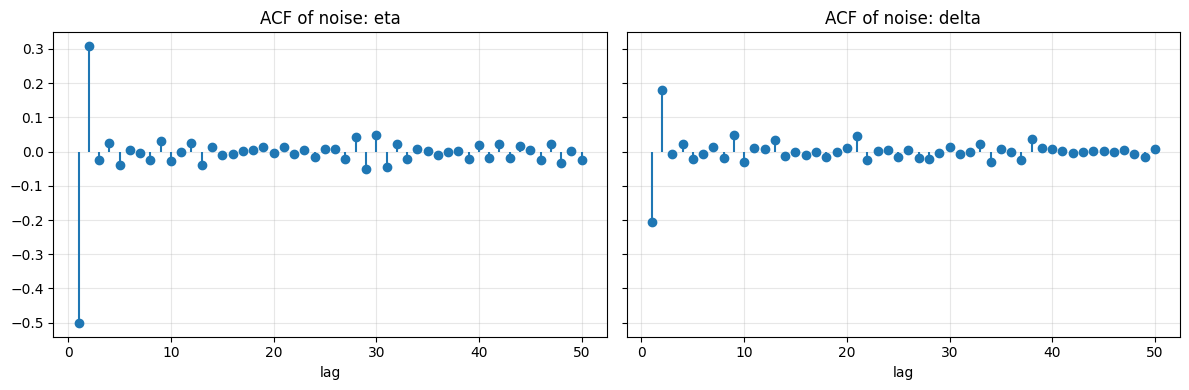

In [ ]:
# Plot ACF of noise processes (MA(2))
def acf_manual(x: np.ndarray, nlags: int) -> np.ndarray:
    x = np.asarray(x, dtype=float)
    x = x - x.mean()
    denom = np.dot(x, x)
    acf = np.empty(nlags + 1)
    acf[0] = 1.0
    for k in range(1, nlags + 1):
        acf[k] = np.dot(x[:-k], x[k:]) / denom
    return acf

nlags = 50
acf_eta = acf_manual(eta, nlags)
acf_delta = acf_manual(delta, nlags)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

ax[0].stem(range(1, nlags + 1), acf_eta[1:], basefmt=" ")
ax[0].set_title("ACF of noise: eta")
ax[0].set_xlabel("lag")

ax[1].stem(range(1, nlags + 1), acf_delta[1:], basefmt=" ")
ax[1].set_title("ACF of noise: delta")
ax[1].set_xlabel("lag")

for a in ax:
    a.grid(True, alpha=0.3)

plt.tight_layout()
